### To build the procgen
in terminal:
python -c "from procgen.builder import build; build()"

**If build fails with LNK1168 error:**
1. Restart Jupyter kernel
2. Close all Python processes
3. Delete .build folder and rebuild


```

**After installation, restart the Jupyter kernel!**

Note: We use sb3 2.0.0a5 which still supports gym 0.23.1 before the gymnasium migration.

### Prevent Auto-Build (Use Pre-Built DLLs Only)

Set environment variable to skip automatic rebuilding.

In [ ]:
# Enable auto-reload for imported modules
%load_ext autoreload
%autoreload 2

In [1]:
# Record full episodes with viewer-quality video
import os
import numpy as np
from stable_baselines3 import PPO
import gym, procgen
import imageio

model_path = "models\\fruitbot\\20251127-165318_easy\\ppo_final.zip"

# Create videos directory
os.makedirs("videos", exist_ok=True)

# Create environment with rgb_array rendering
env = gym.make(
            'procgen-fruitbot-v0', 
            render_mode='human',
            distribution_mode='easy',
            use_discrete_action_wrapper=True,
            use_stay_bonus_wrapper=True,
            stay_bonus=0.1,
        )

# Load model
if os.path.exists(model_path):
    model = PPO.load(model_path)
    print(f"Loaded PPO model from {model_path}")
else:
    model = None
    print("Using random actions")

# Record episodes
obs = env.reset()
if isinstance(obs, tuple):
    obs = obs[0]

done = False
episode_reward = 0
    
while not done:
    # Get action
    if model is not None:
        action, _ = model.predict(obs, deterministic=True)
    else:
        action = env.action_space.sample()
    
    # Step environment
    result = env.step(action)
    if len(result) == 5:
        obs, rew, done, truncated, info = result
        done = done or truncated
    else:
        obs, rew, done, info = result
    episode_reward += rew
    
env.close()
    

c:\Users\matan\anaconda3\envs\procgen_env_clone\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using prebuilt binaries from: c:\Users\matan\master_thesis\rl_envs\procgen\procgen\.build\relwithdebinfo\RelWithDebInfo
Loaded PPO model from models\fruitbot\20251127-165318_easy\ppo_final.zip


## CNN architecuter

In [ ]:
from stable_baselines3 import PPO
import torch

# Load your trained model
model = PPO.load("models/fruitbot/20251117-143015/ppo_final.zip")

print("="*60)
print("FULL ACTOR-CRITIC NETWORK")
print("="*60)
print(model.policy)


# Count parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("\n" + "="*60)
print("PARAMETER COUNT")
print("="*60)
print(f"Feature extractor: {count_parameters(model.policy.features_extractor):,} params")
print(f"Actor head: {count_parameters(model.policy.action_net):,} params")
print(f"Critic head: {count_parameters(model.policy.value_net):,} params")
print(f"Total: {count_parameters(model.policy):,} params")

FULL ACTOR-CRITIC NETWORK
ActorCriticCnnPolicy(
  (features_extractor): NatureCNN(
    (cnn): Sequential(
      (0): Conv2d(3, 32, kernel_size=(8, 8), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (linear): Sequential(
      (0): Linear(in_features=1024, out_features=512, bias=True)
      (1): ReLU()
    )
  )
  (pi_features_extractor): NatureCNN(
    (cnn): Sequential(
      (0): Conv2d(3, 32, kernel_size=(8, 8), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (linear): Sequential(
      (0): Linear(in_features=1024, out_features=512, bias=True)
      (1): ReLU()
    )
  )
  (vf_features_extracto

### Record Full Episodes with Viewer-Quality Video



In [3]:
# Record full episodes with viewer-quality video
import os
import numpy as np
from stable_baselines3 import PPO
import gym, procgen
import imageio
from PIL import Image

model_path = "models\\fruitbot\\20251127-165318_easy\\ppo_final.zip"

# Create videos directory
os.makedirs("videos", exist_ok=True)

# Create environment with rgb_array rendering
env = gym.make(
            'procgen-fruitbot-v0', 
            render_mode='rgb_array',
            distribution_mode='easy',
            use_discrete_action_wrapper=True,
            use_stay_bonus_wrapper=True,
            stay_bonus=0.1,
        )

# Load model
if os.path.exists(model_path):
    model = PPO.load(model_path)
    print(f"Loaded PPO model from {model_path}")
else:
    model = None
    print("Using random actions")

# Record episodes
obs = env.reset()
if isinstance(obs, tuple):
    obs = obs[0]

done = False
episode_reward = 0
frames = []
    
while not done:
    # Capture high-res frame
    frame = env.render()
    if frame is not None:
        frames.append(frame)

    # Get action
    if model is not None:
        action, _ = model.predict(obs, deterministic=True)
    else:
        action = env.action_space.sample()
    
    # Step environment
    result = env.step(action)
    if len(result) == 5:
        obs, rew, done, truncated, info = result
        done = done or truncated
    else:
        obs, rew, done, info = result
    episode_reward += rew
    
    
    

# Validate frames before saving
valid_frames = []
for f in frames:
    arr = np.asarray(f)
    if arr.dtype != np.uint8:
        arr = arr.astype(np.uint8)
    if arr.ndim == 3 and arr.shape[2] == 3:
        valid_frames.append(arr)
    else:
        print(f"Skipping invalid frame with shape {arr.shape}")

print(f"Captured {len(valid_frames)} valid frames out of {len(frames)} total frames")

# Save frames as images
screenshots_dir = "tests\\frameshots"
os.makedirs(screenshots_dir, exist_ok=True)
if valid_frames:
    valid_frames = valid_frames + [valid_frames[-1]]*3  # Ensure at least one frame
    for idx, frame in enumerate(valid_frames):
        if idx % 3 == 0:  # Save every 3rd frame
            img_path = os.path.join(screenshots_dir, f"fruitbot_frame_{idx}.png")
            Image.fromarray(frame).save(img_path)
# Save video
# if frames:
#     video_path = f"videos/fruitbot_highres_episode.mp4"
#     imageio.mimsave(video_path, frames, fps=15)
#     print(f"Reward: {episode_reward} - Frames: {len(frames)} - Saved to {video_path}")
# else:
#     print(f"No frames captured!")

# env.close()
# print("\nAll high-resolution videos saved to 'videos' folder")



Using prebuilt binaries from: c:\Users\matan\master_thesis\rl_envs\procgen\procgen\.build\relwithdebinfo\RelWithDebInfo
Loaded PPO model from models\fruitbot\20251127-165318_easy\ppo_final.zip
Captured 420 valid frames out of 420 total frames


## Analyze Bot Colors and Size

Inspect a sample frame to determine the exact RGB colors and dimensions of the robot (gray body + darker wheels).

Frame shape: (512, 512, 3), dtype: uint8
Bottom region shape: (2, 512, 3) (y from 460 to 512)



Filtered to 2 gray/black/white colors (from 846 total)

Top 30 GRAY/BLACK/WHITE colors (RGB) in bottom region:
Rank | RGB Color        | Count  | Fraction | Hex      | Category
-------------------------------------------------------------------------------------
   1 | (70, 70, 70)     |     32 |  3.12% | #464646 | GRAY (very uniform)
   2 | (84, 84, 84)     |      4 |  0.39% | #545454 | GRAY (very uniform)

Color palette (top 20 gray/black/white colors):


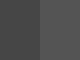


Color statistics from detected bot colors:
  Gray colors: 2
    R range: [70, 84]
    G range: [70, 84]
    B range: [70, 84]

Detected 2 connected components from gray/black/white pixels

Largest component (likely the bot):
  Bounding box: x=158, y=0, w=9, h=2
  Area: 18 pixels
  Centroid: (162.0, 0.5)
  Global position: x=158, y=460

Bot detection visualization:


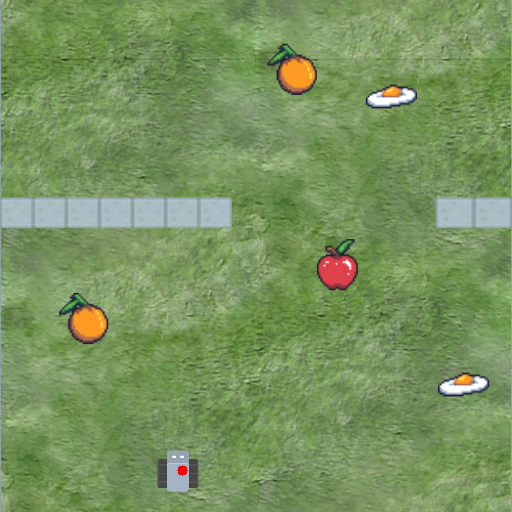


Top 10 GRAY/BLACK/WHITE colors in detected bot region:
Rank | RGB Color        | Count  | Fraction | Hex      | Category
--------------------------------------------------------------------------------
   1 | (70, 70, 70)     |     16 | 88.89% | #464646 | GRAY (body)
   2 | (84, 84, 84)     |      2 | 11.11% | #545454 | GRAY (body)


In [ ]:
import numpy as np
import cv2
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

# Load test frame and resize to 512x512x3
test_frame_path = "tests/frameshots/fruitbot_frame_12.png"
img = Image.open(test_frame_path)
img = img.resize((512, 512))
frame = np.array(img)

print(f"Frame shape: {frame.shape}, dtype: {frame.dtype}")

# Focus on bottom 1/5 of frame where bot is located
h, w, _ = frame.shape
y_start = int(h * 0.9)
bottom_region = frame[y_start:y_start+2, :, :]



print(f"Bottom region shape: {bottom_region.shape} (y from {y_start} to {h})")
display(Image.fromarray(bottom_region))

# Analyze colors in bottom region
pixels = bottom_region.reshape(-1, 3)
unique_colors, counts = np.unique(pixels, axis=0, return_counts=True)

# Filter for GRAY, BLACK, and WHITE colors only (bot-like colors)
# Gray: low variance between R,G,B channels, mid-range values
# Black: all channels low
# White: all channels high
def is_gray_black_or_white(rgb, max_variance=30, gray_min=60, gray_max=200, black_max=60, white_min=200):
    """Check if RGB color is gray-ish, black, or white"""
    r, g, b = rgb
    variance = np.var([r, g, b])
    mean_val = np.mean([r, g, b])
    
    is_black = (r < black_max) and (g < black_max) and (b < black_max)
    is_white = (r >= white_min) and (g >= white_min) and (b >= white_min) and (variance < max_variance)
    is_gray = (variance < max_variance) and (gray_min <= mean_val <= gray_max)
    
    return is_black or is_gray or is_white

# Filter to bot-like colors
bot_color_mask = np.array([is_gray_black_or_white(col) for col in unique_colors])
bot_colors = unique_colors[bot_color_mask]
bot_counts = counts[bot_color_mask]

print(f"\nFiltered to {len(bot_colors)} gray/black/white colors (from {len(unique_colors)} total)")

if len(bot_colors) > 0:
    bot_order = np.argsort(-bot_counts)
    
    print("\nTop 30 GRAY/BLACK/WHITE colors (RGB) in bottom region:")
    print("Rank | RGB Color        | Count  | Fraction | Hex      | Category")
    print("-" * 85)
    for i, idx in enumerate(bot_order[:30], 1):
        col = tuple(int(v) for v in bot_colors[idx])
        cnt = int(bot_counts[idx])
        frac = cnt / float(pixels.shape[0])
        hex_color = "#{:02x}{:02x}{:02x}".format(*col)
        
        # Categorize
        if max(col) < 60:
            category = "BLACK"
        elif min(col) >= 200 and np.var(col) < 30:
            category = "WHITE"
        elif np.var(col) < 10:
            category = "GRAY (very uniform)"
        else:
            category = "GRAY (slight tint)"
        
        print(f"{i:4} | {col!s:16} | {cnt:6} | {frac:6.2%} | {hex_color} | {category}")
    
    # Create palette of top 20 gray/black/white colors
    top_n = min(20, len(bot_order))
    palette_h = 60
    palette = np.zeros((palette_h, 40 * top_n, 3), dtype=np.uint8)
    for i, idx in enumerate(bot_order[:top_n]):
        palette[:, i*40:(i+1)*40, :] = bot_colors[idx]
    
    print("\nColor palette (top 20 gray/black/white colors):")
    display(Image.fromarray(palette))
    
    # Now detect bot using refined thresholds from actual colors
    # Get the range of gray/black/white colors actually present
    if len(bot_colors) > 0:
        black_colors = bot_colors[[max(c) < 60 for c in bot_colors]]
        white_colors = bot_colors[[min(c) >= 200 and np.var(c) < 30 for c in bot_colors]]
        gray_colors = bot_colors[[not (max(c) < 60 or (min(c) >= 200 and np.var(c) < 30)) for c in bot_colors]]
        
        print(f"\nColor statistics from detected bot colors:")
        if len(black_colors) > 0:
            print(f"  Black colors: {len(black_colors)}")
            print(f"    Max value: {black_colors.max()}")
        if len(white_colors) > 0:
            print(f"  White colors: {len(white_colors)}")
            print(f"    Min value: {white_colors.min()}")
            print(f"    R range: [{white_colors[:,0].min()}, {white_colors[:,0].max()}]")
            print(f"    G range: [{white_colors[:,1].min()}, {white_colors[:,1].max()}]")
            print(f"    B range: [{white_colors[:,2].min()}, {white_colors[:,2].max()}]")
        if len(gray_colors) > 0:
            print(f"  Gray colors: {len(gray_colors)}")
            print(f"    R range: [{gray_colors[:,0].min()}, {gray_colors[:,0].max()}]")
            print(f"    G range: [{gray_colors[:,1].min()}, {gray_colors[:,1].max()}]")
            print(f"    B range: [{gray_colors[:,2].min()}, {gray_colors[:,2].max()}]")
else:
    print("No gray/black/white colors found - bot may not be visible in this region")

# Detect bot using gray/black/white color masks
gray_mask = np.zeros(bottom_region.shape[:2], dtype=np.uint8)
black_mask = np.zeros(bottom_region.shape[:2], dtype=np.uint8)
white_mask = np.zeros(bottom_region.shape[:2], dtype=np.uint8)

for y in range(bottom_region.shape[0]):
    for x in range(bottom_region.shape[1]):
        rgb = tuple(bottom_region[y, x, :])
        if is_gray_black_or_white(rgb):
            if max(rgb) < 60:
                black_mask[y, x] = 255
            elif min(rgb) >= 200 and np.var(rgb) < 30:
                white_mask[y, x] = 255
            else:
                gray_mask[y, x] = 255

combined_mask = cv2.bitwise_or(cv2.bitwise_or(gray_mask, black_mask), white_mask)

# Clean up mask
kernel = np.ones((3,3), np.uint8)
combined_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel, iterations=2)
combined_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_OPEN, kernel, iterations=1)

# Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(combined_mask, connectivity=8)

print(f"\nDetected {num_labels - 1} connected components from gray/black/white pixels")
if num_labels > 1:
    areas = stats[1:, cv2.CC_STAT_AREA]
    largest_idx = 1 + int(np.argmax(areas))
    
    x = stats[largest_idx, cv2.CC_STAT_LEFT]
    y = stats[largest_idx, cv2.CC_STAT_TOP]
    w_box = stats[largest_idx, cv2.CC_STAT_WIDTH]
    h_box = stats[largest_idx, cv2.CC_STAT_HEIGHT]
    area = stats[largest_idx, cv2.CC_STAT_AREA]
    cx, cy = centroids[largest_idx]
    
    print(f"\nLargest component (likely the bot):")
    print(f"  Bounding box: x={x}, y={y}, w={w_box}, h={h_box}")
    print(f"  Area: {area} pixels")
    print(f"  Centroid: ({cx:.1f}, {cy:.1f})")
    print(f"  Global position: x={x}, y={y_start + y}")
    
    # Visualize detection
    vis = bottom_region.copy()
    vis = frame.copy()
    # cv2.rectangle(vis, (x, y), (x + w_box, y + h_box), (0, 255, 0), 2)
    cv2.circle(vis, (int(cx)+15, 470), 5, (255, 0, 0), -1)
    
    print("\nBot detection visualization:")
    display(Image.fromarray(vis))
    
    # Extract bot region and re-analyze its colors
    bot_region = bottom_region[y:y+h_box, x:x+w_box, :]
    bot_pixels_extracted = bot_region.reshape(-1, 3)
    bot_unique_extracted, bot_counts_extracted = np.unique(bot_pixels_extracted, axis=0, return_counts=True)
    
    # Filter to gray/black/white in extracted region
    bot_gbw_mask = np.array([is_gray_black_or_white(col) for col in bot_unique_extracted])
    bot_gbw_colors = bot_unique_extracted[bot_gbw_mask]
    bot_gbw_counts = bot_counts_extracted[bot_gbw_mask]
    
    if len(bot_gbw_colors) > 0:
        bot_gbw_order = np.argsort(-bot_gbw_counts)
        
        print(f"\nTop 10 GRAY/BLACK/WHITE colors in detected bot region:")
        print("Rank | RGB Color        | Count  | Fraction | Hex      | Category")
        print("-" * 80)
        for i, idx in enumerate(bot_gbw_order[:10], 1):
            col = tuple(int(v) for v in bot_gbw_colors[idx])
            cnt = int(bot_gbw_counts[idx])
            frac = cnt / float(bot_pixels_extracted.shape[0])
            hex_color = "#{:02x}{:02x}{:02x}".format(*col)
            
            if max(col) < 60:
                category = "BLACK (wheels)"
            elif min(col) >= 200 and np.var(col) < 30:
                category = "WHITE (highlights)"
            elif np.var(col) < 10:
                category = "GRAY (body)"
            else:
                category = "GRAY (tinted)"
            
            print(f"{i:4} | {col!s:16} | {cnt:6} | {frac:6.2%} | {hex_color} | {category}")

In [3]:
import numpy as np
from PIL import Image, ImageDraw
import os

def hex_to_rgb(h):
    h = h.lstrip('#')
    return tuple(int(h[i:i+2], 16) for i in (0, 2, 4))

def find_x_on_row(frame: np.ndarray, target_hex: str = '#464646', row: int = 470) -> int:
    """Return median x index on `row` where pixel equals target_hex. Return None if no match."""
    img = np.asarray(frame)
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError('frame must be HxWx3 RGB uint8')
    h, w, _ = img.shape
    if row < 0 or row >= h:
        raise ValueError('row out of bounds')
    target = np.array(hex_to_rgb(target_hex), dtype=np.uint8)
    row_pixels = img[row, :, :]
    matches = np.all(row_pixels == target, axis=1)
    xs = np.nonzero(matches)[0]
    if xs.size == 0:
        return None
    return int(np.median(xs))

def draw_orenge_dot(frame: np.ndarray, x: int, y: int, offset_x: int = 10, radius: int = 3) -> np.ndarray:
    """Draw a red filled dot at (x+offset_x, y) on a copy of frame and return it. If x is None, returns a copy unchanged."""
    img = np.asarray(frame).copy()
    h, w, _ = img.shape
    if x is None:
        return img
    dot_x = int(np.clip(x + offset_x, 0, w - 1))
    dot_y = int(np.clip(y, 0, h - 1))
    pil = Image.fromarray(img)
    draw = ImageDraw.Draw(pil)
    left = max(dot_x - radius, 0)
    top = max(dot_y - radius, 0)
    right = min(dot_x + radius, w - 1)
    bottom = min(dot_y + radius, h - 1)
    draw.ellipse((left, top, right, bottom), fill=(255, 165, 0))
    return np.array(pil)

# Quick test (uses tests/frameshots/fruitbot_frame_3.png if present)
try:
    frames_jumps = 3
    base_path = 'tests/frameshots/fruitbot_frame_0.png'
    base_img = Image.open(base_path).convert('RGB').resize((512, 512))
    base_frame = np.array(base_img) 
    page_steps = 66
    for i in range(page_steps//frames_jumps + 1):
        image_path = f'tests/frameshots/fruitbot_frame_{frames_jumps*i}.png'
        if os.path.exists(image_path):
            pil_img = Image.open(image_path).convert('RGB').resize((512, 512))
        frame = np.array(pil_img)
        cx = find_x_on_row(frame, '#464646', row=470)
        bot_step = 7
        base_frame = draw_orenge_dot(base_frame, cx, 470 - (bot_step*frames_jumps*i), offset_x=4, radius=5)
    if cx is not None:
        out_path = 'tests/frameshots/fruitbot_frame_marked.png'
        Image.fromarray(base_frame).save(out_path)
        print(f'Found match at cx={cx}. Saved annotated image to {out_path}')
    else:
        print('No exact #464646 pixel found on row 470.')
except FileNotFoundError:
    print('Test image not found; functions are defined for use in notebook.')

Found match at cx=379. Saved annotated image to tests/frameshots/fruitbot_frame_marked.png


In [13]:
def record_bot_path_on_frames(
                              frames_path: str = 'tests/frameshots/frames',
                              frame_start: int = 0,
                              frames_jumps: int = 3,
                              page_steps: int = 23,
                              bot_step: int = 7,
                              row: int = 470,
                              target_hex: str = '#464646',
                              offset_x: int = 4,
                              radius: int = 5,
                            #   out_path: str = 'tests/frameshots/fruitbot_frame_marked.png',
                              path_number: int = 1) -> Image.Image:
    """Record bot path on frames and return the final annotated image."""

    starting_image_path = os.path.join(frames_path, f'fruitbot_frame_{frame_start*frames_jumps}.png')
    if not os.path.exists(starting_image_path):
        print("There is no image in path=", starting_image_path)
        return None
    
    print(f'Starting image path: {starting_image_path}')
    base_image = Image.open(starting_image_path).convert('RGB').resize((512, 512))
    base_frame = np.array(base_image)
    for i in range(page_steps):
        image_path = os.path.join(frames_path, f'fruitbot_frame_{frames_jumps*(i+frame_start)}.png')
        # print(f'Processing frame: {image_path}')
        if os.path.exists(image_path):
            pil_img = Image.open(image_path).convert('RGB').resize((512, 512))
        else:
            print(f'Image not found: {image_path}, skipping.')
            break
        frame = np.array(pil_img)
        cx = find_x_on_row(frame, target_hex, row=row)
        base_frame = draw_orenge_dot(base_frame, cx, row - (bot_step*frames_jumps*i), offset_x=offset_x, radius=radius)
    return Image.fromarray(base_frame)

def combine_paths(first_image_path: str, sec_image_path: str, save_path: str) -> Image.Image:
    img1 = Image.open(first_image_path).convert('RGB')
    img2 = Image.open(sec_image_path).convert('RGB')

    w1, h1 = img1.size
    w2, h2 = img2.size
    out_w = max(w1, w2)
    out_h = h1 + h2 - 25  # subtract cut_px from total height

    combined = Image.new('RGB', (out_w, out_h), (0, 0, 0))

    cut_px = 25  # pixels to remove from bottom of second image
    w2, h2 = img2.size
    img2_cropped = img2.crop((0, 0, w2, max(0, h2 - cut_px)))

    # center horizontally when pasting
    combined.paste(img2_cropped, ((out_w - w2) // 2, 0))      # sec_image on top
    combined.paste(img1, ((out_w - w1) // 2, img2_cropped.height))     # first image below
    combined.save(save_path)
    print(f"Saved combined image to {save_path}")
    return combined


path_image_0 = record_bot_path_on_frames(frames_path='tests/frameshots')
path_image_0.save('tests/frameshots/fruitbot_path_0.png')

Starting image path: tests/frameshots\fruitbot_frame_0.png


## Create models path side by side

In [5]:
# Enable auto-reload for imported modules
%load_ext autoreload
%autoreload 2

import os
import numpy as np
from stable_baselines3 import PPO
import gym
from PIL import Image
import procgen
import shutil
import random
from dpu_clf import compare_models

# Create output directories
os.makedirs("tests/first_model/frames", exist_ok=True)
os.makedirs("tests/sec_model/frames", exist_ok=True)

# Clear previous frames
for folder in ["tests/first_model/frames", "tests/sec_model/frames"]:
    for f in os.listdir(folder):
        if f.startswith("fruitbot_frame_"):
            os.remove(os.path.join(folder, f))

# Load both models
model1_path = "models/fruitbot/20251130-093847_easy/ppo_final.zip"
model2_path = "models/fruitbot/20251130-001800_easy/ppo_final.zip"

model1 = PPO.load(model1_path)
model2 = PPO.load(model2_path)
print(f"Loaded model 1 from {model1_path}")
print(f"Loaded model 2 from {model2_path}")



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loaded model 1 from models/fruitbot/20251130-093847_easy/ppo_final.zip
Loaded model 2 from models/fruitbot/20251130-001800_easy/ppo_final.zip


In [6]:
# Create base environment
seed = 128122 #random.randint(1, 10000)
env = gym.make(
    'procgen-fruitbot-v0', 
    render_mode='rgb_array',
    distribution_mode='easy',
    use_discrete_action_wrapper=True,
    use_stay_bonus_wrapper=True,
    stay_bonus=0.1,
    rand_seed=seed
)

env2 = gym.make(
    'procgen-fruitbot-v0', 
    render_mode='rgb_array',
    distribution_mode='easy',
    use_discrete_action_wrapper=True,
    use_stay_bonus_wrapper=True,
    stay_bonus=0.1,
    rand_seed=seed
)

compare_models(env, env2, model1_path=model1_path, model2_path=model2_path, save_path='tests/')

Using prebuilt binaries from: c:\Users\matan\master_thesis\rl_envs\procgen\procgen\.build\relwithdebinfo\RelWithDebInfo
Using prebuilt binaries from: c:\Users\matan\master_thesis\rl_envs\procgen\procgen\.build\relwithdebinfo\RelWithDebInfo
found 231 files in folder
Starting image path: tests//model1_frames\fruitbot_frame_0.png
Starting image path: tests//model1_frames\fruitbot_frame_69.png
Starting image path: tests//model1_frames\fruitbot_frame_138.png
Starting image path: tests//model1_frames\fruitbot_frame_207.png
Image not found: tests//model1_frames\fruitbot_frame_231.png, skipping.
There is no image in path= tests//model1_frames\fruitbot_frame_276.png
finish with 4 paths
Saved combined image to tests//model1_path/fruitbot_full_path_combined.png
Saved combined image to tests//model1_path/fruitbot_full_path_combined.png
Saved combined image to tests//model1_path/fruitbot_full_path_combined.png
found 240 files in folder
Starting image path: tests//model2_frames\fruitbot_frame_0.png


In [9]:
# Run model 1 and save frames
print("\nRunning model 1...")
frames1 = []
done = False
step = 0

while not done:
    # Render and save frame
    frame = env.render()
    if frame is not None and step%3 == 0:
        frame_resized = np.array(Image.fromarray(frame).resize((512, 512)))
        frames1.append(frame_resized)
        
        # Save every frame
        frame_path = f"tests/first_model/frames/fruitbot_frame_{step}.png"
        Image.fromarray(frame_resized).save(frame_path)
    
    # Get action and step
    action, _ = model1.predict(obs1, deterministic=True)
    result = env.step(action)
    
    if len(result) == 5:
        obs1, rew, done, truncated, info = result
        done = done or truncated
    else:
        obs1, rew, done, info = result
    
    step += 1

print(f"Model 1 completed in {step} steps, saved {len(frames1)} frames")
env.close()


Running model 1...
Model 1 completed in 396 steps, saved 132 frames


In [10]:
# Run model 2 and save frames
print("\nRunning model 2...")
frames2 = []
done = False
step = 0

while not done:
    # Render and save frame
    frame = env2.render()
    if frame is not None and step%3 == 0:
        frame_resized = np.array(Image.fromarray(frame).resize((512, 512)))
        frames2.append(frame_resized)
        
        # Save every frame (fixed filename - removed extra slash before extension)
        frame_path = f"tests/sec_model/frames/fruitbot_frame_{step}.png"
        Image.fromarray(frame_resized).save(frame_path)
    
    # Get action and step
    action, _ = model2.predict(obs2, deterministic=True)
    result = env2.step(action)
    
    if len(result) == 5:
        obs2, rew, done, truncated, info = result
        done = done or truncated
    else:
        obs2, rew, done, info = result
    
    step += 1

print(f"Model 2 completed in {step} steps, saved {len(frames2)} frames")
env2.close()


Running model 2...
Model 2 completed in 420 steps, saved 140 frames


In [14]:
def draw_full_path(frames_path: str, out_path: str):
    frames_num = len([f for f in os.listdir(frames_path) if f.startswith('fruitbot_frame_') and f.endswith('.png')])
    print(f"found {frames_num} files in folder")
    first_frame = 0
    path_num = 1
    while first_frame < frames_num:
        image = record_bot_path_on_frames(
            frames_path=frames_path,
            frame_start=first_frame,
            frames_jumps=3,
            page_steps=23,
            bot_step=7,
            row=470,
            target_hex='#464646',
            offset_x=4,
            radius=5
        )
        # display(image)
        image.save(out_path+f'/fruitbot_path_{path_num}.png')
        path_num += 1
        first_frame += 23
    print(f"finish with {path_num-1} paths")

    combine_paths(
        first_image_path=out_path+'/fruitbot_path_1.png',
        sec_image_path=out_path+'/fruitbot_path_2.png',
        save_path=out_path+'/fruitbot_full_path_combined.png'
    )

    next_path = 3
    while(next_path)<path_num:
        combine_paths(
            first_image_path=out_path+'/fruitbot_full_path_combined.png',
            sec_image_path=out_path+f'/fruitbot_path_{next_path}.png',
            save_path=out_path+'/fruitbot_full_path_combined.png'
        )
        next_path +=1

draw_full_path(frames_path='tests/first_model/frames', out_path='tests/first_model')
draw_full_path(frames_path='tests/sec_model/frames', out_path='tests/sec_model')

found 132 files in folder
Starting image path: tests/first_model/frames\fruitbot_frame_0.png
Starting image path: tests/first_model/frames\fruitbot_frame_69.png
Starting image path: tests/first_model/frames\fruitbot_frame_138.png
Starting image path: tests/first_model/frames\fruitbot_frame_207.png
Starting image path: tests/first_model/frames\fruitbot_frame_276.png
Starting image path: tests/first_model/frames\fruitbot_frame_345.png
Image not found: tests/first_model/frames\fruitbot_frame_396.png, skipping.
finish with 6 paths
Saved combined image to tests/first_model/fruitbot_full_path_combined.png
Saved combined image to tests/first_model/fruitbot_full_path_combined.png
Saved combined image to tests/first_model/fruitbot_full_path_combined.png
Saved combined image to tests/first_model/fruitbot_full_path_combined.png
Saved combined image to tests/first_model/fruitbot_full_path_combined.png
found 140 files in folder
Starting image path: tests/sec_model/frames\fruitbot_frame_0.png
Starti

## Create a video from the frames

In [11]:
# Record full episodes with viewer-quality video
import os
import numpy as np
from stable_baselines3 import PPO
import gym, procgen
import imageio
import cv2

model_path = "models/fruitbot/20251129-092520_easy/ppo_final.zip"

# Create videos directory
os.makedirs("videos", exist_ok=True)

# Create environment with rgb_array rendering
#seed = 1222
env = gym.make(
    'procgen-fruitbot-v0', 
    render_mode='rgb_array',
    distribution_mode='easy',
    use_discrete_action_wrapper=True,
    use_stay_bonus_wrapper=True,
    stay_bonus=0.1,
    rand_seed=seed
)

# Load model
model = PPO.load(model_path)
print(f"Loaded PPO model from {model_path}")

# Record episodes
obs = env.reset()
done = False
frames = []
episode_reward = 0
    
while not done:
    # Capture high-res frame
    frame = env.render()
    if frame is not None:
        frames.append(frame)
    action, _ = model.predict(obs, deterministic=True)
    
    # Step environment
    result = env.step(action)
    if len(result) == 5:
        obs, rew, done, truncated, info = result
        done = done or truncated
    else:
        obs, rew, done, info = result
    episode_reward += rew

# Validate frames before saving
valid_frames = []
for f in frames:
    arr = np.asarray(f)
    if arr.dtype != np.uint8:
        arr = arr.astype(np.uint8)
    if arr.ndim == 3 and arr.shape[2] == 3:
        valid_frames.append(arr)
    else:
        print(f"Skipping invalid frame with shape {arr.shape}")

print(f"Captured {len(valid_frames)} valid frames out of {len(frames)} total frames")

# Save frames as images
screenshots_dir = "videos\\frameshots"
os.makedirs(screenshots_dir, exist_ok=True)
if valid_frames:
    valid_frames = valid_frames + [valid_frames[-1]]*3  # Ensure at least one frame
    for idx, frame in enumerate(valid_frames):
        if idx % 3 == 0:  # Save every 3rd frame
            img_path = os.path.join(screenshots_dir, f"fruitbot_frame_{idx}.png")
            Image.fromarray(frame).save(img_path)
            # print(f"Saved high-res screenshot to {img_path}")
# Save video
if frames:
    video_path = os.path.join("videos", "fruitbot_run.mp4")
    height, width, _ = valid_frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(video_path, fourcc, 15.0, (width, height))
    
    for frame in valid_frames:
        # Convert RGB to BGR for OpenCV
        bgr_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        out.write(bgr_frame)
    
    out.release()
    print(f"Saved video to {video_path}")
else:
    print(f"No frames captured!")

env.close()
print("\nAll high-resolution videos saved to 'videos' folder")



Using prebuilt binaries from: c:\Users\matan\master_thesis\rl_envs\procgen\procgen\.build\relwithdebinfo\RelWithDebInfo
Loaded PPO model from models/fruitbot/20251129-092520_easy/ppo_final.zip
Captured 396 valid frames out of 396 total frames
Saved video to videos\fruitbot_run.mp4

All high-resolution videos saved to 'videos' folder


## Old Usage Example

In [12]:
# import os

# # Draw paths for both models
# print("\nDrawing paths...")
# # Collect saved frame filenames for model 1 (used to determine page_steps)     

# frames1_dir = 'tests/first_model/frames'
# if os.path.isdir(frames1_dir):
#     frames1 = sorted([f for f in os.listdir(frames1_dir) if f.startswith('fruitbot_frame_') and f.endswith('.png')])
# else:
#     frames1 = []

# # Also report how many frames exist for the second model folder
# sec_frames_dir = 'tests/sec_model/frames'
# sec_frames_count = len([f for f in os.listdir(sec_frames_dir) if f.startswith('fruitbot_frame_') and f.endswith('.png')]) if os.path.isdir(sec_frames_dir) else 0

# print(f"Model 1 frames found: {len(frames1)} (directory: {frames1_dir})")
# print(f"Model 2 frames found: {sec_frames_count} (directory: {sec_frames_dir})")

# # Model 1 path
# path_image_1 = record_bot_path_on_frames(
#     frames_path=frames1_dir,
#     frame_start=0,
#     frames_jumps=3,
#     page_steps=min(66, len(frames1) // 3),
#     bot_step=7,
#     row=470,
#     target_hex='#464646',
#     offset_x=4,
#     radius=5
# )
# path_image_1.save('tests/first_model/fruitbot_path.png')
# print("Saved model 1 path to tests/first_model/fruitbot_path.png")

# # Model 2 path
# path_image_2 = record_bot_path_on_frames(
#     frames_path='tests/sec_model/frames',
#     frame_start=0,
#     frames_jumps=3,
#     page_steps=min(66, len(frames2) // 3),
#     bot_step=7,
#     row=470,
#     target_hex='#464646',
#     offset_x=4,
#     radius=5
# )
# path_image_2.save('tests/sec_model/fruitbot_path.png')
# print("Saved model 2 path to tests/sec_model/fruitbot_path.png")

In [ ]:
# # Display both paths side by side
# from IPython.display import display

# print("\nModel 1 Path (20251129-092520_easy):")
# display(path_image_1)

# print("\nModel 2 Path (20251127-165318_easy):")
# display(path_image_2)

# # Create side-by-side comparison
# w1, h1 = path_image_1.size
# w2, h2 = path_image_2.size
# total_width = w1 + w2
# max_height = max(h1, h2)

# comparison = Image.new('RGB', (total_width, max_height), (255, 255, 255))
# comparison.paste(path_image_1, (0, 0))
# comparison.paste(path_image_2, (w1, 0))

# comparison.save('tests/models_comparison.png')
# print("\nSide-by-side comparison:")
# display(comparison)

: 